In [1]:
#import library yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Tahap 1 Preprocessing Data

In [29]:
# reading the value from the csv file.
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [30]:
#checking the missing value
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Beberapa catatan 

#In case ada missing value (NaN) beberapa opsi yang bisa dilakukan adalah : 

# Menghapus baris yang mengandung missing values
df_dropna_rows = df.dropna() #pakai variabel ini untuk proses selanjutnya

# Menghapus kolom yang mengandung missing values kalau data Nan > 60%
df_dropna_cols = df.dropna(axis=1)

# Mengisi missing values dengan nilai tertentu (misal, 0)
df_filled = df.fillna(0)

# Mengisi missing values dengan rata-rata kolom
df['A'].fillna(df['A'].mean(), inplace=True)

# Mengisi missing values dengan median kolom
df['B'].fillna(df['B'].median(), inplace=True)

# Mengisi missing values dengan modus kolom
df['C'].fillna(df['C'].mode()[0], inplace=True)


Jika ada kolom yang tipe datanya categorical (tulisan dsb / bukan angka) maka kolom tersebut harus diconvert menjadi angka dengan metod encoder

#merubah semua kolom kategorical menjadi numerical
from sklearn.preprocessing import LabelEncoder
# Mendeteksi kolom kategori
categorical_cols = data_train.select_dtypes(include=['object']).columns

# Membuat objek LabelEncoder
label_encoders = {}

# Mengubah kolom kategori menjadi numerik
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data_train[col] = label_encoders[col].fit_transform(data_train[col])

# Tahap 2 : Apply Machine Learning

In [31]:
#defenisikan variabel x dan y nya

x= df.iloc[:, [0,1,2,3,4,5,6,7]].values #data/ informasi untuk memprediksi apakah sesorang terindikasi diabetes atau tidak
y= df.iloc[:, [8]].values  #yang ingin kita prediksi

In [32]:
#membagi data menjadi data training (75%) dan data testing(25%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) #75% dari data jadi data training

In [33]:
#data-data yang ada diatur kembali skalanya
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)      

berikut kita aplikasikan beberapa algoritma ML

# 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression #nama modelnya
classifier = LogisticRegression(random_state = 0)  #panggil modelnya
classifier.fit(x_train, y_train) #fitting model ML nya

C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [35]:
y_pred = classifier.predict(x_test) #predisksi model

In [36]:
#prediksi nilai tertentu 

prediksi = classifier.predict([[6,148,72,35,0,55.6,0.627,50]])

print("Apakah seseorang akan terindikasi Diabetes ? (1 = ya, 0 = tidak) :", prediksi)

Apakah seseorang akan terindikasi Diabetes ? (1 = ya, 0 = tidak) : [1]


In [37]:
#mencari nilai akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred) 

0.8020833333333334

In [38]:
#mencari nilai metric yang lebih lengkap
print("Metric Performa Machine Learning")
print(classification_report(y_test, y_pred))

Metric Performa Machine Learning
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



<Axes: >

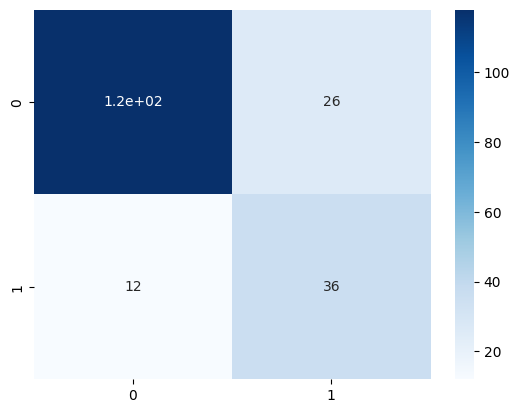

In [53]:
cf_matrix = confusion_matrix(y_pred, y_test)

sns.heatmap(cf_matrix, annot=True, cmap='Blues')


# 2. K Nearest Neigbors

In [54]:
from sklearn.neighbors import KNeighborsClassifier
model_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model_classifier.fit(x_train, y_train)

C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [55]:
y_pred_2 = model_classifier.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(y_test, y_pred_2)  

0.8020833333333334

# 3. Random Forest classification

In [57]:
from sklearn.ensemble import RandomForestClassifier
classifier_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier_forest.fit(x_train, y_train)

C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [44]:
y_predict_3= classifier_forest.predict(x_test)

In [45]:
accuracy_score(y_test, y_predict_3)

0.7239583333333334

# 4. Support Vector Machine

In [46]:
from sklearn.svm import SVC
classifier_svc = SVC(kernel = 'linear', random_state = 0)
classifier_svc.fit(x_train, y_train)

C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=0)

In [47]:
y_pred_4 = classifier_svc.predict(x_test)

In [48]:
accuracy_score(y_test, y_pred_4)

0.8020833333333334

# 5. Kernel SVM

In [58]:
from sklearn.svm import SVC
classifier_kernel = SVC(kernel = 'rbf', random_state = 0)
classifier_kernel.fit(x_train, y_train)

C:\Users\anisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(random_state=0)

In [50]:
y_pred_5 = classifier_kernel.predict(x_test)

In [60]:
accuracy_score(y_test, y_pred_5)

0.7760416666666666

In [61]:
#ngoding, database, matematika, robotik, statistik => teknik informatika / sistem komputer 

#ngoding robotik, arduino/esp8266/esp32, c++, =>microcontroller 

#sistem informasi => belajar bisnis, IT, sedikit ngoding